In [43]:
import pandas as pd
import numpy as np

df_E1 = pd.read_csv('./new task/E1.csv', sep=';', low_memory=False,index_col=None)
df_H1 = pd.read_csv('./new task/H1.csv', sep=';',low_memory=False,index_col=None)
df_ABW = pd.read_csv('./new task/ABW.csv', sep=';',low_memory=False,index_col=None)
df_score = pd.read_csv('./new task/Score.csv', sep=';',low_memory=False,index_col=None)

In [44]:
df_E1.head(10)

,Order,SKU_number,SoldFlag,Sold Count,EditionNumber,HasEditionFlag,RankAvg1,ListPrice,PublYear,LowUsedPrice,LowNewPrice,PageCount,BookCount,EditionsCount,PriorAnywhereSoldBook,PriorAnywhereSoldISBN
0,3,178024,1,2,3,1,1233862,104.95,2005,4.00,26.19,3,44.0,7,8,3
1,4,169903,1,1,9,1,100504,267.95,2009,7.16,46.57,9,57.0,7,13,7
2,5,170125,1,1,6,1,362749,183.95,2010,7.22,23.70,6,79.0,7,17,10
3,6,52280,1,1,3,1,288271,243.95,2007,4.99,11.99,3,101.0,12,62,12
4,7,50647,1,1,3,1,473942,113.95,2007,4.85,22.72,3,82.0,7,29,18
5,8,114788,1,1,3,1,802747,81.33,2003,4.00,12.49,3,84.0,4,14,14
6,9,200443,1,1,1,0,956815,67.95,2009,13.88,48.99,1,33.0,2,5,5
7,10,132967,1,1,10,1,68808,130.60,2009,28.96,154.75,10,37.0,12,9,3
8,11,270690,1,1,3,1,657492,109.00,2010,4.00,14.94,3,109.0,7,25,17
9,12,434811,1,1,8,1,681807,85.00,2010,11.17,42.98,8,34.0,5,12,5


In [35]:
df_E1=df_E1.drop(['Order','Sold Count','SKU_number'], axis=1)

df_H1=df_H1.drop(['Order','BookID', 'ISBN','SKU_number','Sold Count'],axis=1)

df_ABW=df_ABW.drop('Sold Count', axis=1)

df_score=df_score.drop('Sold Count', axis=1)

In [36]:
df_ABW['PriorAnywhereSoldISBN'] = pd.to_numeric(df_ABW['PriorAnywhereSoldISBN'], errors='coerce')

df_E1=df_E1.dropna(subset=['BookCount'])

df_score['LowUsedPrice'] = pd.to_numeric(df_score['LowUsedPrice'], errors='coerce')
df_score['ListPrice'] = pd.to_numeric(df_score['ListPrice'], errors='coerce')
df_score['LowNewPrice'] = pd.to_numeric(df_score['LowNewPrice'], errors='coerce')
df_score['EditionsCount']=pd.to_numeric(df_score['EditionsCount'], errors='coerce')
df_score['PriorAnywhereSoldISBN'] = pd.to_numeric(df_score['PriorAnywhereSoldISBN'], errors='coerce')

df_score['EditionsCount']=df_score['EditionsCount'].astype(int)
df_score['BookCount']=df_score['BookCount'].astype(float)
df_score['PriorAnywhereSoldISBN']=df_score['PriorAnywhereSoldISBN'].astype(int)

In [37]:
print (df_E1['SoldFlag'].value_counts())
print (df_H1['SoldFlag'].value_counts())
print (df_ABW['SoldFlag'].value_counts())

0    73886
1     5915
Name: SoldFlag, dtype: int64
0    88854
1     1159
Name: SoldFlag, dtype: int64
0    57265
1     2180
Name: SoldFlag, dtype: int64


In [38]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_E1[df_E1.SoldFlag==0]
df_minority = df_E1[df_E1.SoldFlag==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=73886,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_E1 = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print (df_E1.SoldFlag.value_counts())

# Separate majority and minority classes
df_majority = df_H1[df_H1.SoldFlag==0]
df_minority = df_H1[df_H1.SoldFlag==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=88854,    # to match majority class
                                 random_state=345) # reproducible results
 
# Combine majority class with upsampled minority class
df_H1 = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print (df_H1.SoldFlag.value_counts())


# Separate majority and minority classes
df_majority = df_ABW[df_ABW.SoldFlag==0]
df_minority = df_ABW[df_ABW.SoldFlag==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=57265,    # to match majority class
                                 random_state=567) # reproducible results
 
# Combine majority class with upsampled minority class
df_ABW = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print (df_ABW.SoldFlag.value_counts())

1    73886
0    73886
Name: SoldFlag, dtype: int64
1    88854
0    88854
Name: SoldFlag, dtype: int64
1    57265
0    57265
Name: SoldFlag, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

y=df_E1['SoldFlag']
X=df_E1.drop('SoldFlag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create training and testing vars
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(118217, 12) (118217,)
(29555, 12) (29555,)


In [40]:
import xgboost as xgb

from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.08, n_estimators=200, max_depth=10)
xgb_model.fit(X_train, y_train)

print (xgb_model.score(X_train,y_train))

from sklearn.metrics import accuracy_score
pred_y_0 = xgb_model.predict(X_test)
print( accuracy_score(pred_y_0, y_test))

probs=xgb_model.predict_proba(df_score)

print ("Dataset E1 probabilities:",probs)

0.932623903499
0.904652343089
Dataset E1 probabilities: [[ 0.88830489  0.1116951 ]
 [ 0.92300928  0.0769907 ]
 [ 0.91810739  0.08189261]
 ..., 
 [ 0.94049901  0.05950101]
 [ 0.93064392  0.06935609]
 [ 0.90762728  0.09237273]]


In [41]:
y=df_H1['SoldFlag']
X=df_H1.drop('SoldFlag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create training and testing vars
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

xgb_model = XGBClassifier(learning_rate=0.08, n_estimators=200, max_depth=10)
xgb_model.fit(X_train, y_train)

print (xgb_model.score(X_train,y_train))

from sklearn.metrics import accuracy_score
pred_y_0 = xgb_model.predict(X_test)
print( accuracy_score(pred_y_0, y_test))

probs=xgb_model.predict_proba(df_score)

print ("Dataset H1 probabilities:",probs)

(142166, 12) (142166,)
(35542, 12) (35542,)
0.993338772984
0.988689437848
Dataset H1 probabilities: [[  7.63333738e-01   2.36666277e-01]
 [  9.99345124e-01   6.54849166e-04]
 [  9.98750746e-01   1.24925061e-03]
 ..., 
 [  9.96429801e-01   3.57020367e-03]
 [  9.93879259e-01   6.12075021e-03]
 [  9.98837292e-01   1.16272934e-03]]


In [42]:
y=df_ABW['SoldFlag']
X=df_ABW.drop('SoldFlag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create training and testing vars
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

xgb_model = XGBClassifier(learning_rate=0.08, n_estimators=200, max_depth=10)
xgb_model.fit(X_train, y_train)

print (xgb_model.score(X_train,y_train))

from sklearn.metrics import accuracy_score
pred_y_0 = xgb_model.predict(X_test)
print( accuracy_score(pred_y_0, y_test))

probs=xgb_model.predict_proba(df_score)

print ("Dataset ABW probabilities:",probs)

(91624, 12) (91624,)
(22906, 12) (22906,)
0.995285078145
0.979175761809
Dataset ABW probabilities: [[  9.99983728e-01   1.62592460e-05]
 [  9.54631090e-01   4.53689024e-02]
 [  9.99958098e-01   4.19053467e-05]
 ..., 
 [  9.99988139e-01   1.18707067e-05]
 [  9.99969423e-01   3.05853027e-05]
 [  9.99921441e-01   7.85869561e-05]]


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000000016103588>>
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 343, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


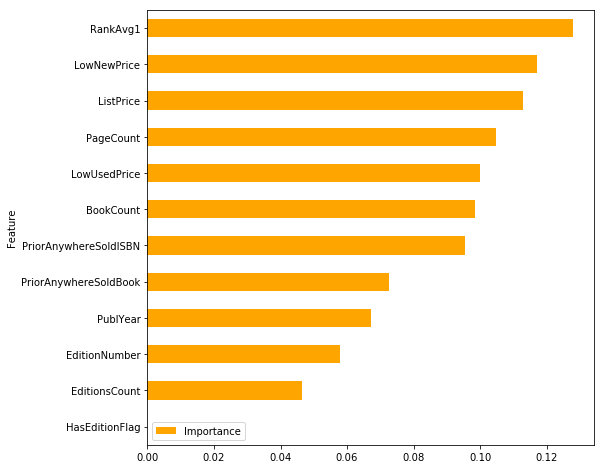

In [45]:
%matplotlib inline

importances=xgb_model.feature_importances_

importance_frame = pd.DataFrame({'Importance': list(importances), 'Feature': list(X_train.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')